<a href="https://colab.research.google.com/github/akshithamaddi/SIGIR/blob/main/Data_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv("Article_information.csv")
df

,Unnamed: 0,Article_id,Venue,Title,Year,Abstract,Doi,fieldsOfStudy,topics,Downloadurl,TotalCitationCount,TotalDownloadCount,Influentialcitationcount
0,0,https://doi.org/10.1145/511285.511286,SIGIR '71,Introduction and perspectives for the 1971 ACM...,1971,introduction prospectives provided 1971 acm in...,10.1145/511285.511286,Computer Science,"Information retrieval,Document retrieval",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,0,222,0
1,1,https://doi.org/10.1145/511285.511288,SIGIR '71,The function of semantics in automated languag...,1971,paper survey major semantic models developed a...,10.1145/511285.511288,Computer Science,"SIMMON,Semantic analysis (compilers),Lexicon,N...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,6,728,0
2,2,https://doi.org/10.1145/511285.511289,SIGIR '71,How features resolve syntactic ambiguity,1971,ambiguity pervasive important aspect natural l...,10.1145/511285.511289,Computer Science,"Natural language,Formal language,Parsing,Softw...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,4,280,0
3,3,https://doi.org/10.1145/511285.511290,SIGIR '71,The converse natural language data management ...,1971,paper presents overview research progress prin...,10.1145/511285.511290,Computer Science,"Database,Natural language,Management system,Co...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,10,256,0
4,4,https://doi.org/10.1145/511285.511292,SIGIR '71,"CUE: a preprocessor system for restricted, nat...",1971,cue input interface system permits computer ut...,10.1145/511285.511292,Computer Science,"Preprocessor,Transformational grammar,Input de...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,4,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,762,https://doi.org/10.1145/3331184.3331420,SIGIR'19,Document Distance Metric Learning in an Intera...,2019,visualization interdocument similarities widel...,10.1145/3331184.3331420,Computer Science,"Exploratory search,Query by Example,Mechatroni...",https://dl.acm.org/doi/pdf/10.1145/3331184.333...,0,95,0
4429,763,https://doi.org/10.1145/3331184.3331421,SIGIR'19,Measuring Job Search Effectiveness,2019,users online job search websites interact rank...,10.1145/3331184.3331421,Computer Science,"User modeling,Modeling perspective,Web search ...",https://dl.acm.org/doi/pdf/10.1145/3331184.333...,0,122,0
4430,764,https://doi.org/10.1145/3331184.3331422,SIGIR'19,Informing the Design of Conversational IR Syst...,2019,recent developments conversational ir raised q...,10.1145/3331184.3331422,Computer Science,Interaction,https://dl.acm.org/doi/pdf/10.1145/3331184.333...,1,104,0
4431,765,https://doi.org/10.1145/3331184.3331423,SIGIR'19,Evaluating Risk-Sensitive Text Retrieval,2019,search engines loyal userbase face difficult t...,10.1145/3331184.3331423,Computer Science,"Baseline (configuration management),Web search...",https://dl.acm.org/doi/pdf/10.1145/3331184.333...,0,71,0


In [ ]:
#average number of SIGIR Articles per year
df.loc[df['Venue'].str.contains('SIGIR',na=False), 'Venue'] = 'SIGIR'
df1 = df.loc[df['Venue'] == 'SIGIR']
authors_per_year = pd.DataFrame(df1['Year'].value_counts()).reset_index()
authors_per_year.columns = ['Year', 'No.of.Articles']
sort_by_year = authors_per_year.sort_values('Year')
sort_by_year

,Year,No.of.Articles
35,1971,19
37,1978,12
36,1979,14
34,1981,21
33,1983,29
32,1985,31
28,1986,35
30,1987,34
24,1988,45
23,1989,54


In [ ]:
# Using plotly.express
import plotly.express as px

import pandas as pd
fig = px.line(sort_by_year, x='Year', y='No.of.Articles',title="SIGIR Publications each Year")
fig.show()

In [ ]:
N = 5
sort_by_year["No.of.Articles"].groupby(sort_by_year["No.of.Articles"].index // N).mean()

0    245.8
1    217.8
2    178.8
3    102.0
4     62.6
5     38.4
6     29.6
7     15.0
Name: No.of.Articles, dtype: float64

In [ ]:
# Import pandas library 
import pandas as pd 
# initialize list of lists 
data = [['2015-2019', 245.8], ['2010-2014', 217.8], ['2005-2009',  178.8],['2000-2004',102.0],['1995-1999',62.6],['1988-1993',38.4],
        ['1981-1987',29.6],['1971-1979',15.0]] 
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['year', 'Average']) 
# print dataframe. 
df 

,year,Average
0,2015-2019,245.8
1,2010-2014,217.8
2,2005-2009,178.8
3,2000-2004,102.0
4,1995-1999,62.6
5,1988-1993,38.4
6,1981-1987,29.6
7,1971-1979,15.0


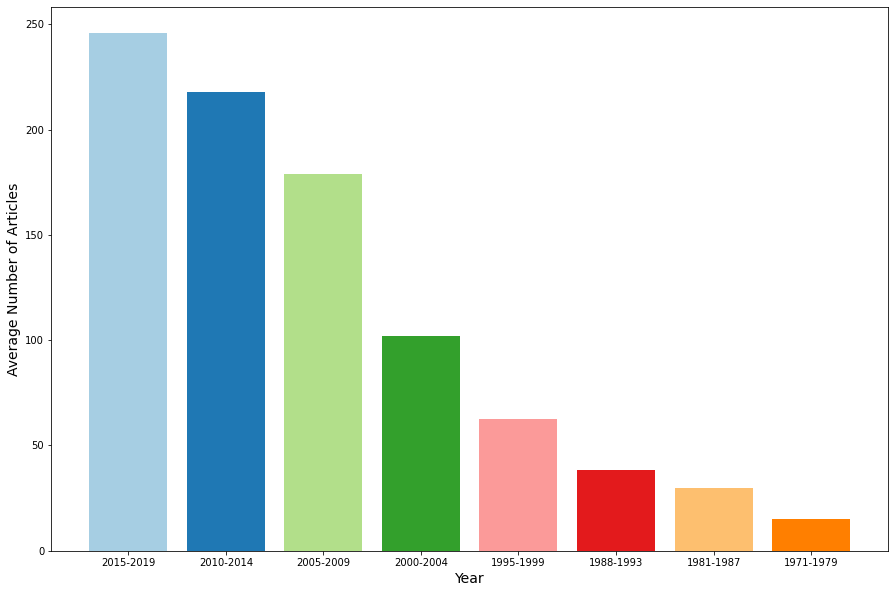

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(15,10))
plt.xlabel("Year",fontsize=14)
plt.ylabel("Average Number of Articles",fontsize=14)

plt.bar(df['year'], df["Average"], color=plt.cm.Paired(np.arange(len(df))))

plt.show()

In [ ]:
#Top Authors ranked by citation count
topauthors = pd.read_csv("Citation_Information.csv")
topauthors.head(5)

,Unnamed: 0,article_id,authorid,authorname,authorurl,paperId,doi,title,venue,year,intent,isInfluential
0,0,10.1145/511285.511288,35022826.0,John A. Moyne,https://www.semanticscholar.org/author/35022826,8113edc6c95508bc7f9ae624903f8f4c98d3395b,10.1007/BF01007763,Relevance of computer science to linguistics a...,International Journal of Computer & Informatio...,1975.0,NaN,False
1,1,10.1145/511285.511288,40005703.0,Raoul N. Smith,https://www.semanticscholar.org/author/40005703,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
2,2,10.1145/511285.511288,144226072.0,Edward Maxwell,https://www.semanticscholar.org/author/144226072,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973.0,NaN,False
3,3,10.1145/511285.511288,1777876.0,Jack Minker,https://www.semanticscholar.org/author/1777876,28dd43a10b78cc6297081fb7b9be86e114894391,10.1145/1095515.1095516,Information storage and retrieval: a survey an...,SIGF,1977.0,NaN,False
4,4,10.1145/511285.511288,48264726.0,George S. Dunham,https://www.semanticscholar.org/author/48264726,24f73ab2828f9aecbc079a9d5f5028c392eaa5b0,10.1002/asi.4630290207,Automatic indexing of pathology data,JASIS,1978.0,NaN,False


In [ ]:
#Auhor analysis and ranking the author based on the total number of articles written.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Author_information.csv")
df['authorId'] = df['authorId'].fillna(0).astype(int)
df['count'] = df.groupby('name')['name'].transform('count')
df.drop_duplicates('name', inplace=True)
#df.nlargest(5, ['count'])[["name","authorId","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=0)
df1 = df1.dropna(subset=['Rank'])
header = ["name", "authorId", "Rank"]
df1.to_csv('author_distribution.csv', columns = header)
plotgraph = pd.read_csv("author_distribution.csv")
plotgraph = df.nlargest(20, ['count'])[["name","count"]]
rank=pd.read_csv("author_distribution.csv")
top10rank = rank.head(20)
plotgraph['Rank'] = top10rank['Rank'].values
plotgraph

,name,count,Rank
49,W. Bruce Croft,101,1.0
2421,Maarten de Rijke,79,2.0
1442,Ryen W. White,57,3.0
1333,ChengXiang Zhai,52,4.0
2363,Leif Azzopardi,50,5.0
1171,Iadh Ounis,48,6.0
562,James Allan,47,7.5
630,James P. Callan,47,7.5
3663,Craig MacDonald,45,9.0
2596,Oren Kurland,40,10.0


In [ ]:
#SIGIR refereneces per year
ref=pd.read_csv("Reference_information.csv")
df1 = ref.replace(np.nan, '', regex=True)
df1.loc[df1['Reference _paper_venue'].str.contains('SIGIR',na=False), 'venue'] = 'SIGIR'
df2 = df1.loc[df1['Reference _paper_venue'] == 'SIGIR']
refer_per_year = pd.DataFrame(df2['Reference _paper_year'].value_counts()).reset_index()
refer_per_year.columns = ['Year', 'Refereneces_Per_year']
sortref_by_year = refer_per_year.sort_values('Year')
sortref_by_year

,Year,Refereneces_Per_year
20,1979.0,3
19,1981.0,3
12,1982.0,17
11,1983.0,20
10,1984.0,20
13,1985.0,8
16,1987.0,7
18,1988.0,4
9,1989.0,24
15,1992.0,7


In [ ]:
#SIGIR Citations per year
import numpy as np
cit=pd.read_csv("Citation_Information.csv")
cit1 = cit.replace(np.nan, '', regex=True)
cit1.loc[cit1['venue'].str.contains('SIGIR',na=False), 'venue'] = 'SIGIR'
cit2 = cit1.loc[cit1['venue'] == 'SIGIR']
cit_per_year = pd.DataFrame(cit2['year'].value_counts()).reset_index()
cit_per_year.columns = ['Year', 'Citations_Per_Year']
sortcit_by_year = cit_per_year.sort_values('Year')
sortcit_by_year

,Year,Citations_Per_Year
34,1973.0,9
35,1980.0,3
37,1981.0,2
36,1982.0,2
38,1983.0,1
32,1985.0,11
33,1986.0,9
31,1987.0,31
29,1988.0,52
24,1989.0,100


In [ ]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
#Comparision of citations and Refereneces each year
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Referencesperyear', x=sortref_by_year['Year'], y=sortref_by_year['Refereneces_Per_year']),
    go.Bar(name='citationsperyear', x=sortcit_by_year['Year'], y=sortcit_by_year['Citations_Per_Year'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

In [ ]:
import pandas as pd

pub= pd.read_csv("Author_information.csv")
df1 = pub.groupby('name', as_index=False).agg({'Publicationcount':'sum'})
df2 =df1.sort_values('Publicationcount',ascending=False)
df3 = df2.head(40)
df3['Rank'] = df3['Publicationcount'].rank(method='dense', ascending=False)
df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,name,Publicationcount,Rank
3137,Maarten de Rijke,61352.0,1.0
5305,W. Bruce Croft,54864.0,2.0
1542,Gang Chen,31438.0,3.0
5348,Wei Liu,29288.0,4.0
6108,Zhigang Chen,27456.0,5.0
5867,Yong Yu,26406.0,6.0
5018,Tat-Seng Chua,20361.0,7.0
725,ChengXiang Zhai,19896.0,8.0
2136,James Allan,19710.0,9.0
2013,Iadh Ounis,17518.0,10.0


In [ ]:
import plotly.express as px
fig = px.scatter(df3, x="Publicationcount", y="Rank",
	         size="Publicationcount", color="name",
           text="name",
                 log_x=True, size_max=60)
fig.update_traces(textposition='middle center')

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
import pandas as pd

df = pd.read_csv("output.csv",usecols = ['article_title','article_year','total_citation'])
df


,article_title,article_year,total_citation
0,The Importance of Interaction for Information ...,2019.0,1
1,Automatic Understanding of the Visual World,2019.0,0
2,A General Framework for Counterfactual Learnin...,2019.0,3
3,To Model or to Intervene: A Comparison of Coun...,2019.0,2
4,Domain Adaptation for Enterprise Email Search,2019.0,0
...,...,...,...
4557,Affective adaptive retrieval: study of emotion...,2009.0,1
4558,A study on performance volatility in informati...,2009.0,0
4559,Novelty detection across different source type...,2009.0,0
4560,Personalizing information retrieval using task...,2009.0,4


In [ ]:
#Keywords csv file
import pandas as pd 
df = pd.read_csv("output.csv",usecols = ['article_title','article_year','total_citation'])
df1=pd.read_csv("Article_information.csv",usecols = ['Title','Year','TotalCitationCount'])
df1.rename(columns = {'Title':'article_title'}, inplace = True) 
df1

,article_title,Year,TotalCitationCount
0,Introduction and perspectives for the 1971 ACM...,1971,0
1,The function of semantics in automated languag...,1971,6
2,How features resolve syntactic ambiguity,1971,4
3,The converse natural language data management ...,1971,10
4,"CUE: a preprocessor system for restricted, nat...",1971,4
...,...,...,...
4428,Document Distance Metric Learning in an Intera...,2019,0
4429,Measuring Job Search Effectiveness,2019,0
4430,Informing the Design of Conversational IR Syst...,2019,1
4431,Evaluating Risk-Sensitive Text Retrieval,2019,0


In [ ]:
mergedStuff = pd.merge(df, df1, on=['article_title'], how='inner')
mergedStuff.drop(['article_year', 'TotalCitationCount'], axis=1, inplace=True)
mergedStuff.to_csv("cit.csv")

In [ ]:

import pandas as pd
df=pd.read_csv("cit.csv",thousands=',')
df['total_citation'] = pd.to_numeric(df['total_citation'])
df1=df[df.total_citation >= 100].groupby('Year')['total_citation'].count().reset_index()
df1

,Year,total_citation
0,1985,2
1,1991,2
2,1992,5
3,1993,8
4,1995,7
5,1996,7
6,1997,6
7,1998,15
8,1999,9
9,2000,6


In [ ]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 27
colors[25] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=df1['Year'], y=df1['total_citation'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.show()

In [ ]:
#top cited article each year
import pandas as pd
top_art=pd.read_csv("cit.csv",thousands=',')
top_art['total_citation'] = pd.to_numeric(top_art['total_citation'])
top_art

,Unnamed: 0,article_title,total_citation,Year
0,0,The Importance of Interaction for Information ...,1.0,2019
1,1,Automatic Understanding of the Visual World,0.0,2019
2,2,A General Framework for Counterfactual Learnin...,3.0,2019
3,3,To Model or to Intervene: A Comparison of Coun...,2.0,2019
4,4,Domain Adaptation for Enterprise Email Search,0.0,2019
...,...,...,...,...
4320,4320,Topic structure for information retrieval,0.0,2002
4321,4321,Using computational community interest as an i...,1.0,2009
4322,4322,Affective adaptive retrieval: study of emotion...,1.0,2009
4323,4323,Novelty detection across different source type...,0.0,2009


In [ ]:
res = top_art.groupby('Year')['total_citation'].max().reset_index()
res.columns = ['Year','total_citation']
res

,Year,total_citation
0,1971,11.0
1,1978,0.0
2,1979,0.0
3,1983,14.0
4,1985,158.0
5,1986,99.0
6,1987,23.0
7,1988,72.0
8,1989,93.0
9,1991,232.0


In [ ]:
df5 = top_art[top_art['total_citation'] == top_art.groupby('Year')['total_citation'].transform('max')]
df2 =df5.sort_values('Year',ascending=False)
df2

,Unnamed: 0,article_title,total_citation,Year
18,18,Neural Graph Collaborative Filtering,16.0,2019
504,504,Adversarial Personalized Ranking for Recommend...,40.0,2018
755,755,Neural Factorization Machines for Sparse Predi...,156.0,2017
1034,1034,Fast Matrix Factorization for Online Recommend...,207.0,2016
1209,1209,Image-Based Recommendations on Styles and Subs...,332.0,2015
1413,1413,Explicit factor models for explainable recomme...,164.0,2014
1668,1668,Time-aware point-of-interest recommendation,341.0,2013
1979,1979,A study of term weighting schemes using class ...,556.0,2012
2105,2105,Exploiting geographical influence for collabor...,532.0,2011
2468,2468,Short text classification in twitter to improv...,334.0,2010
